Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Sümeyye Acar"
COLLABORATORS = ""

---

## Foundations of Data Literacy and Data Science
# Homework 5: Data Visualization Basics

1) a) Import the data frame on life satisfaction in the EU enclosed in the homework. The data frame variable should be called *ls_df*. Source: https://doi.org/10.2908/ILC_PW02 . Make sure all the values are in float format, and the countries make up the row indices. Drop all rows with NaN values from the data frame, and save this change.

In [2]:
import numpy as np
import pandas as pd


ls_df = pd.read_csv("life_satisf.csv", delimiter=";", engine="python")

ls_df.rename(columns={ls_df.columns[0]: "Country"}, inplace=True)

ls_df.set_index("Country", inplace=True)

ls_df = ls_df.apply(pd.to_numeric, errors="coerce")

ls_df.dropna(inplace=True)

ls_df.head()


# raise NotImplementedError()

,2013,2018,2021,2022,2023,2024
Country,,,,,,
Belgien,7.5,7.6,7.5,7.6,7.7,7.6
Bulgarien,4.8,5.4,5.7,5.6,5.9,6.2
Tschechien,6.9,7.4,7.3,7.4,7.4,7.4
Dänemark,8.0,7.8,7.5,7.6,7.5,7.6
Estland,6.5,7.0,7.2,7.2,7.2,7.1


In [3]:
print(ls_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Belgien to Norwegen
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2013    26 non-null     float64
 1   2018    26 non-null     float64
 2   2021    26 non-null     float64
 3   2022    26 non-null     float64
 4   2023    26 non-null     float64
 5   2024    26 non-null     float64
dtypes: float64(6)
memory usage: 1.4+ KB
None


1) b) Use a conditional statement to check if there are any NaN values in the data frame. If so, automatically drop all rows with NaN values and save this change.
*Hint:* You can do this using only functions from the lab session, but the pandas function .any() is more elegant here.

In [4]:
if ls_df.isnull().any().any():
    ls_df.dropna(inplace=True)

print("Any NaNs remaining?", ls_df.isnull().values.any())


# raise NotImplementedError()

Any NaNs remaining? False


2) Compute the first, second and third quartile for each year using the function from the lab session. Make sure all first quartiles are saved together in an array called *quart1*, all the medians in an array called *medians*, and all the third quartiles in an array called *quart3*.

In [5]:
quart1 = ls_df.quantile(0.25).values
medians = ls_df.quantile(0.50).values
quart3 = ls_df.quantile(0.75).values

# raise NotImplementedError()

In [6]:
print(quart1, medians, quart3)

[6.525 7.    6.85  7.025 7.2   7.2  ] [7.05 7.35 7.25 7.3  7.4  7.4 ] [7.475 7.7   7.5   7.6   7.6   7.6  ]


3) Find out the range of the scale used to measure the data (see the source above), and save the min and max in a list called *scale_range*.

In [7]:
scale_range = [0, 10]
# raise NotImplementedError()

In [8]:
print(scale_range)

[0, 10]


4) Visualize the data in a series of violin plots within one figure. There should be one violin for each year, and they should stand in a row. Also show a thick line representing the interval from quartile 1 to 3 in each violin. Connect the medians across years with a line plot. Make sure to label the x and y axes, and the x axis ticks. The y axis limits should represent the scale range.

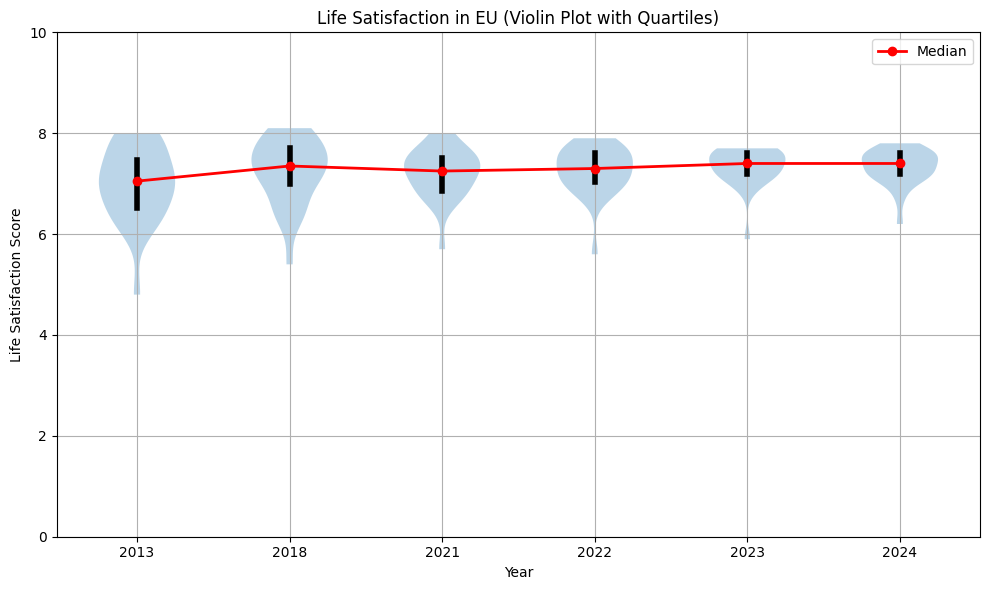

In [9]:
import matplotlib.pyplot as plt


years = ls_df.columns.astype(str)
positions = np.arange(len(years))

fig, ax = plt.subplots(figsize=(10, 6))

parts = ax.violinplot(
    [ls_df[year] for year in ls_df.columns],
    positions=positions,
    showmeans=False,
    showextrema=False,
    showmedians=False,
)

for i in range(len(positions)):
    ax.plot(
        [positions[i], positions[i]], [quart1[i], quart3[i]], color="black", linewidth=4
    )

ax.plot(positions, medians, color="red", linewidth=2, marker="o", label="Median")

# Label all 
ax.set_xticks(positions)
ax.set_xticklabels(years)
ax.set_xlabel("Year")
ax.set_ylabel("Life Satisfaction Score")
ax.set_title("Life Satisfaction in EU (Violin Plot with Quartiles)")
ax.set_ylim(scale_range)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# raise NotImplementedError()